ChEn-3170: Computational Methods in Chemical Engineering Fall 2021 UMass Lowell; Prof. V. F. de Almeida **13Sep21**

# 05. Basic Flow Controls in Python
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Objectives](#obj)
* [Modules](#modules)
* [Conditionals](#conditionals)
 + [Assert](#assert)
 + [If](#if)
* [Loops](#loops)
 + [For](#for)
 + [While](#while)
 + [List comprehension](#listcomp)
* [Functions](#functions)
 + [Example:](#get_triangular_matrix) get triangular matrix
 + [Example:](#forward_solve) foward substitution solve
* [Input/Output](#io)
 + [Read "text"](#itext)
* [URL Image Import](#url)
---

## [Objectives](#toc)<a id="obj"></a>

 + Describe a variety of controls used to manipulate the execution of a Python program in this course.

## [Modules](#toc)<a id="modules"></a>
We have been using `import` packages into the Python notebook (*e.g* `import numpy as np`). We can use this to simplify our future coding experience and accelerate learning. For instance, we can use import of our own codes. In this course a directory named `chen_3170` was created in the [repository](https://github.com/dpploy/chen-3170) file system to store course-related Python code. The syntax to import codes in the repository is as follows:

In [1]:
'''To view what is available'''

import chen_3170

help(chen_3170)

Help on package chen_3170:

NAME
    chen_3170

PACKAGE CONTENTS
    help
    toolkit

FILE
    (built-in)




In [2]:
'''Check individual packages'''

import chen_3170.help

help(chen_3170.help)

Help on module chen_3170.help in chen_3170:

NAME
    chen_3170.help - #--*-- coding: utf-8 -*-

FUNCTIONS
    color_map(num_colors)
        Nice colormap for plotting.
        
        Parameters
        ----------
        num_colors: int
            Number of colors.
        
        Returns
        -------
        color_map: list(tuple(R,G,B,A))
            List with colors interpolated from internal list of primary colors.
    
    forward_solve(l_mtrx, b_vec, loop_option='use-dot-product', zero_tol=1e-12)
        Performs a forward solve with a lower triangular matrix and right side vector.
        
        Parameters
        ----------
        l_mtrx: numpy.ndarray
           Lower triangular matrix.
        b_vec:  numpy.ndarray
           Right-side vector.
        loop_option: string
           This is an internal option to demonstrate the usage of an explicit
           double loop or an implicit loop using a dot product.
        zero_tol: float
           Tolerance for non-z

In [3]:
'''Import the get_triangular_matrix function'''

from chen_3170.help import get_triangular_matrix

help(get_triangular_matrix)

Help on function get_triangular_matrix in module chen_3170.help:

get_triangular_matrix(mode='lower', ndim=None, mtrx=None)
    Returns a triangular matrix in-place.
    
    If a matrix is given, the function will modify the input, in place, into a
    triangular matrix. The mtrx object will be modified and reflected on the callee
    side. Otherwise, the function generates a random triangular matrix.
    
    Parameters
    ----------
    mode: string, optional
          Type of triangular matrix: 'lower' or 'upper'. Defaults to lower
          triangular.
    ndim: int, optional
          Dimension of the square matrix. If a matrix is not provided this
          argument is required.
    mtrx: numpy.ndarray, optional
          square matrix to be turned into a triangular matrix.
    
    Returns
    -------
    mtrx: numpy.ndarray
          If a matrix was not passed the return is random array. If a matrix
          was passed, its view is modified.
    
    Examples
    --------
  

In [4]:
'''Practice using the function'''

a_mtrx = get_triangular_matrix('lower',5) # lower triangular random matrix 5 x 5
print('a_mtrx =\n',a_mtrx)

a_mtrx = get_triangular_matrix('upper',5) # upper triangular random matrix 5 x 5
print('a_mtrx =\n',a_mtrx)

import numpy as np
ones_mtrx = np.ones((5,5))
print('ones_mtrx =\n',ones_mtrx)

a_mtrx = get_triangular_matrix('lower', mtrx=ones_mtrx)
print('a_mtrx =\n',a_mtrx)

a_mtrx =
 [[0.8267223  0.         0.         0.         0.        ]
 [0.36476855 0.58227107 0.         0.         0.        ]
 [0.25723536 0.65792947 0.09780194 0.         0.        ]
 [0.66433781 0.2262318  0.26190705 0.81640971 0.        ]
 [0.64227573 0.49438643 0.13685709 0.70501783 0.12101889]]
a_mtrx =
 [[0.69026177 0.26265733 0.68513964 0.76362976 0.08258962]
 [0.         0.523391   0.51839958 0.0921589  0.4233903 ]
 [0.         0.         0.05336382 0.80852885 0.50907836]
 [0.         0.         0.         0.30884444 0.93640775]
 [0.         0.         0.         0.         0.82563631]]
ones_mtrx =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
a_mtrx =
 [[1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1.]]


matrix shape = (5, 5)


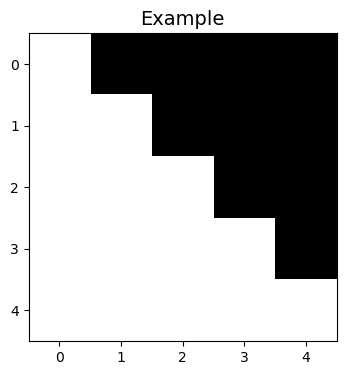

In [5]:
'''Auxiliary function'''

from chen_3170.help import plot_matrix

plot_matrix(a_mtrx, title='Example')

<div class="alert alert-block alert-warning">
The source code should be inspected for correctness and as a source of information for future programing. This is how the source code can be viewed and copied into a notebook cell.
</div>

In [6]:
'''View the source code in the notebook'''

# This command does not work on Windows (the source code is provide below in any case)
!cat "chen_3170/help.py" # ugly but works for now

# This command seems to work on Windows (uncomment the next line)
#!type "chen_3170\help.py"

#!/usr/bin/env python
#--*-- coding: utf-8 -*-

import numpy as np

def get_triangular_matrix( mode='lower', ndim=None, mtrx=None ):
    """Returns a triangular matrix in-place.

    If a matrix is given, the function will modify the input, in place, into a
    triangular matrix. The mtrx object will be modified and reflected on the callee
    side. Otherwise, the function generates a random triangular matrix.

    Parameters
    ----------
    mode: string, optional
          Type of triangular matrix: 'lower' or 'upper'. Defaults to lower
          triangular.
    ndim: int, optional
          Dimension of the square matrix. If a matrix is not provided this
          argument is required.
    mtrx: numpy.ndarray, optional
          square matrix to be turned into a triangular matrix.

    Returns
    -------
    mtrx: numpy.ndarray
          If a matrix was not passed the return is random array. If a matrix
          was passed, its view is modified.

    Examples


    >>> from chen

Copying the source code to this cell and rendering it with code block fences gives:

```python
def get_triangular_matrix( mode='lower', ndim=None, mtrx=None ):
    '''
    Returns a triangular matrix in-place.

    If a matrix is given, the function will modify the input, in place, into a 
    triangular matrix. The mtrx object will be modified and reflected on the callee side.
    Otherwise, the function generates a random triangular matrix.

    Parameters
    ----------
    mode: string, optional
          Type of triangular matrix: 'lower' or 'upper'. Defaults to lower 
          triangular.
    ndim: int, optional
          Dimension of the square matrix. If a matrix is not provided this 
          argument is required. 
    mtrx: numpy.ndarray, optional
          square matrix to be turned into a triangular matrix.
    
    Returns
    -------
    mtrx: numpy.ndarray
          If a matrix was not passed the return is random array. If a matrix
          was passed, its view is modified.

    Examples
    --------

    >>> a_mtrx = ce.get_triangular_matrx('lower',3)
    >>> a_mtrx
    array([[0.38819556, 0.    , 0.        ],
       [0.12304746, 0.07522054, 0.        ],
       [0.96357929, 0.69187941, 0.2878785 ]])

    '''

    assert ndim is None or mtrx is None, 'ndim or mtrx must be given; not both.'
    assert not (ndim is None and mtrx is None), 'either ndim or mtrx must be given.'
    assert mode =='lower' or mode =='upper', 'invalid mode %r.'%mode
    
    if mtrx is None:
        import numpy as np
        mtrx = np.random.random((ndim,ndim))
    else:
        assert mtrx.shape[0] == mtrx.shape[1], 'matrix not square.' 
    
    # ready to return matrix  
    if mode == 'lower':
        for i in range(mtrx.shape[0]):
            mtrx[i,i+1:] = 0.0
    elif mode == 'upper':
        for j in range(mtrx.shape[1]):
            mtrx[j+1:,j] = 0.0
    else:
        assert False, 'oops. something is very wrong.'

    return mtrx      
```

## [Conditionals](#toc)<a id="conditionals"></a>
Constructs that allow branching of operations. The most importants are:
 1. `assert` statement
 1. `if` statement

### [`Assert` statement](#toc)<a id="assert"></a>
The general format is:
```python
    assert test, string(formatted)
```
and it tests for whether `test` is `True`.

### Examples
```python
    assert ndim is None or mtrx is None, 'ndim or mtrx must be given; not both.'
    assert not (ndim is None and mtrx is None), 'either ndim or mtrx must be given.'
    assert mode =='lower' or mode =='upper', 'invalid mode %r.'%mode
    # better yet
    assert mode in ('lower', 'upper'), 'invalid mode %r.'%mode
```

In [7]:
'''Testing example'''

import numpy as np

ndim = None
#ndim = 1  # uncomment for failing assert
mtrx = np.random.random((3,4))

assert ndim is None or mtrx is None, 'either ndim or mtrx must be given; not both'

#mtrx = None # uncomment for failing assert
assert not (ndim is None and mtrx is None), 'either ndim or mtrx must be given; ndim = %r; mtrx = %r.'%(ndim, mtrx)

In [8]:
'''Testing example'''

import numpy as np

mode = 'lower'
#mode = 'dontknow' # uncomment for a failing assert

assert mode == 'lower' or mode == 'upper', 'invalid mode: %r.'%mode
# better yet
assert mode in ('lower', 'upper'), 'invalid mode %r.'%mode

### [`If` statement](#toc)<a id='if'></a>
The general format is:
```python
if test1:        # if test
    statements1  # associated block
elif test2:      # optional elifs
    statements2
elif test3:      # more optional elifs etc.
    statements3
else:            # optional final else
    statements4
    
# continue normal flow from here
```

### Example
If-else example:
```python
    if mtrx is None:      # test if mtrx has type None
        import numpy as np
        mtrx = np.random.random((n,n))  # associated block
    else:                 # final test
        assert mtrx.shape[0] == mtrx.shape[1] # l_mtrx must be square
```

In [9]:
'''Testing example'''

test = 1 # change this to 1, 2 or 3

# test setup (uses multiway branching)
if test == 1:
    mtrx = None
    n = 4    
elif test == 2:
    import numpy as np
    mtrx = np.array( [ [3.4, 2.1, 4.5],
                       [0.0, 2.0, 1.0] 
                     ] )
elif test == 3:
    import numpy as np
    mtrx = np.array( [ [ 3.4,  2.1,  4.5],
                       [ 0.0,  2.0,  1.0],
                       [-1.0, -3.0, -5.0]
                     ] )
else:
    assert False, 'test must be 1, 2, or 3.'

# What we are really testing
#---------------------------------------------------------------    
if mtrx is None:      # test if mtrx has type None
    import numpy as np
    mtrx = np.random.random((n,n))  # associated block
else:                 # final test
    assert mtrx.shape[0] == mtrx.shape[1], 'matrix not square.'
#---------------------------------------------------------------
    
print(mtrx)

[[0.1111477  0.87542845 0.8107713  0.47418229]
 [0.91564035 0.23901637 0.55137648 0.50712207]
 [0.45915099 0.55576653 0.17438496 0.4316414 ]
 [0.39645632 0.10445936 0.56742572 0.18902918]]


### Example
Multiway branching example:
```python
    # ready to return matrix  
    if mode == 'lower':                 # test if mode is 'lower'
        for i in range(mtrx.shape[0]):  # associated block of statements
            mtrx[i,i+1:] = 0.0
    elif mode == 'upper':               # test if mode is 'upper'
        for j in range(mtrx.shape[1]):  # associated block of statements
            mtrx[j+1:,j] = 0.0
    else:                               # final test
        assert False, 'mode must be either lower or upper.' # associated block
```

In [10]:
'''Testing example'''

import numpy as np
test = 1 # change this to 1 or 2

mtrx = np.array([[ 3.4,  2.1,  4.5],
                 [ 0.0,  2.0,  1.0],
                 [-1.0, -3.0, -5.0]
                ])
# test setup (uses multiway branching)
if test == 1:
    mode = 'lower'
elif test == 2:
    mode = 'upper'
else:
    assert False,'test must be 1 or 2.'
    
# What we are really testing
#---------------------------------------------------------------    
# ready to return matrix  
if mode == 'lower':                 # test if mode is 'lower'
    for i in range(mtrx.shape[0]):  # associated block of statements
            mtrx[i,i+1:] = 0.0
elif mode == 'upper':               # test if mode is 'upper'
    for j in range(mtrx.shape[1]):  # associated block of statements
        mtrx[j+1:,j] = 0.0
else:                               # final test
    assert False, 'mode must be either "lower" or "upper"' # associated block
#---------------------------------------------------------------
    
print(mtrx)

[[ 3.4  0.   0. ]
 [ 0.   2.   0. ]
 [-1.  -3.  -5. ]]


## [Loops](#toc)<a id="loops"></a>
Contructs that allow repetitive actions on data. There are two basic types: 
 1. `for` loops
 2. `while` loops

### [`For` loops](#toc)<a id='for'></a>

The general format is (**indentation is mandatory**):

```python
for `target` in `object`: # assign object items to target
    
    `statements`      # repeated loop body: (possibly) use target
    
    if test1: 
        break         # exit loop now; skip else
    if test2: 
        continue      # go to top of the loop now
        
else:                 # optional else part
    statements        # if did not hit a `break`
```

### Example
```python
for i in range(mtrx.shape[0]): # assign i to objects in range(mtrx.shape[0])
    mtrx[i, i+1:] = 0.0         # loop over this statement with varying i
```

In [11]:
'''Testing example'''

import numpy as np

mtrx = np.random.random((5,5))
print(mtrx)

m_rows = mtrx.shape[0]

for i in range(m_rows):  # assign i to objects in range(m_rows)
    print('i =',i)
    mtrx[i,i+1:] = 0.0  # for each row, zero out columns to the right of the main diagonal
    
print(mtrx)

[[0.30537721 0.7814123  0.17666507 0.84609977 0.85102721]
 [0.12230123 0.57593462 0.56950587 0.96504958 0.82583125]
 [0.69087847 0.43149602 0.37337073 0.61206435 0.69490324]
 [0.42082022 0.98896742 0.93051086 0.98081329 0.63344352]
 [0.16339793 0.54557346 0.52856865 0.73014435 0.61815908]]
i = 0
i = 1
i = 2
i = 3
i = 4
[[0.30537721 0.         0.         0.         0.        ]
 [0.12230123 0.57593462 0.         0.         0.        ]
 [0.69087847 0.43149602 0.37337073 0.         0.        ]
 [0.42082022 0.98896742 0.93051086 0.98081329 0.        ]
 [0.16339793 0.54557346 0.52856865 0.73014435 0.61815908]]


In [12]:
'''Example with Continue'''

for i in range(10):
    
    if i == 5:
        continue # go to the top of the loop now
        #break
    else:
        print(i)

0
1
2
3
4
6
7
8
9


### [`While` loops](#toc)<a id="while"></a>

The general format is:

```python
    while `test` :
        
        `statments` # loop over the body of statements as long as `test` is true
```

### Example

```python
    while (abs(delta_k) > tolerance or abs(f_k) > tolerance) and k <= k_max:
        
        # body
        
        f_k       = f_eq( ext_hat, x_a_0, x_b_0, x_c_0, eq_kx_cte )
        f_prime_k = f_eq_prime( ext_hat, x_c_0, eq_kx_cte )
        
        delta_k_old = delta_k
        delta_k = -f_k / f_prime_k
        
        ext_hat += delta_k
        
        if k > 0:
            if delta_k != 0.0 and delta_k_old != 0.0:
                convergence_factor = math.log(abs(delta_k),10) / math.log(abs(delta_k_old),10)
            else:
                convergence_factor = 0.0  
        else:
            convergence_factor = 0.0
            
        k = k + 1
        
        if verbose is True:
            print('%2i %+5.3e %+5.3e %+5.3e  %+5.3e %5.2f'%\
                  (k,f_k,f_prime_k,abs(delta_k),ext_hat,convergence_factor))
            
        # ends by indentation
```

In [13]:
'''While example'''

k_max = 9
k = 0

while k <= k_max:
    
    print('k =',k)
    k += 1

k = 0
k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9


### [List Comprehension](#toc)<a id="listcomp"></a>
A list comprehension is simple way to build a for loop inside a Python list. For example:

```python
[i for i in range(10)]
```

In [14]:
'''List Comprehension'''

[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## [Functions](#toc)<a id="functions"></a>
In simple terms, functions are an efficient alternative to *cutting and pasting* code. They increase code reuse, allow for modularity, and are indispensible to software/code design. An initial format of the functions we will use is:
```python
def function_name(param1, param2,..., paramN):
    statements
    ...
    statements
    return result # optional but almost always present
```
The function block has its own scope and no variable name is accessible inside the function unless it is passed through the argument list.

How to use a function with 2 parameters in a Jupyter Notebook cell:

```python
a_param = 10
b_param = 'hello'
c_result = function_name(a_param, b_param)
```

### [Example: get triangular matrix](#toc)<a id="get_triangular_matrix"></a>
```python
def get_triangular_matrix(mode='lower', ndim=None, mtrx=None):

    assert ndim is None or mtrx is None, 'ndim or mtrx must be given; not both.'
    assert mode =='lower' or mode =='upper', 'invalid mode %r.'%mode
    
    if mtrx is None:
        import numpy as np
        mtrx = np.random.random((ndim,ndim))
    else:
        assert mtrx.shape[0] == mtrx.shape[1], 'matrix not square.' 
    
    # ready to return matrix  
    if mode == 'lower':
        for i in range(mtrx.shape[0]):
            mtrx[i,i+1:] = 0.0
    elif mode == 'upper':
        for j in range(mtrx.shape[1]):
            mtrx[j+1:,j] = 0.0
    else:
        assert False, 'mode must be either lower or upper.'
        
    return mtrx     
```

In [15]:
'''Import module'''

from chen_3170.help import get_triangular_matrix

help(get_triangular_matrix)

Help on function get_triangular_matrix in module chen_3170.help:

get_triangular_matrix(mode='lower', ndim=None, mtrx=None)
    Returns a triangular matrix in-place.
    
    If a matrix is given, the function will modify the input, in place, into a
    triangular matrix. The mtrx object will be modified and reflected on the callee
    side. Otherwise, the function generates a random triangular matrix.
    
    Parameters
    ----------
    mode: string, optional
          Type of triangular matrix: 'lower' or 'upper'. Defaults to lower
          triangular.
    ndim: int, optional
          Dimension of the square matrix. If a matrix is not provided this
          argument is required.
    mtrx: numpy.ndarray, optional
          square matrix to be turned into a triangular matrix.
    
    Returns
    -------
    mtrx: numpy.ndarray
          If a matrix was not passed the return is random array. If a matrix
          was passed, its view is modified.
    
    Examples
    --------
  

In [16]:
'''Testing the example'''

import numpy as np
np.set_printoptions(precision=3) 

# no arguments will fail
#a_mtrx = get_triangular_matrix()

In [17]:
'''Testing the example'''

# one-argument call
size = 5
out_mtrx = get_triangular_matrix(ndim=size)

print('out_mtrx =\n', out_mtrx)

out_mtrx =
 [[0.587 0.    0.    0.    0.   ]
 [0.047 0.462 0.    0.    0.   ]
 [0.492 0.853 0.432 0.    0.   ]
 [0.893 0.149 0.886 0.432 0.   ]
 [0.654 0.128 0.094 0.491 0.406]]


In [18]:
'''Testing the example'''

# one-argument call
in_mtrx = np.random.random((size,size))

out_mtrx = get_triangular_matrix(mtrx=in_mtrx)

print('out_mtrx =\n',out_mtrx)

out_mtrx =
 [[0.935 0.    0.    0.    0.   ]
 [0.047 0.689 0.    0.    0.   ]
 [0.223 0.032 0.53  0.    0.   ]
 [0.448 0.637 0.166 0.199 0.   ]
 [0.29  0.58  0.704 0.243 0.808]]


In [19]:
'''Testing the example'''

# two-argument conflicting call will fail

#out_mtrx = get_triangular_matrix(ndim=size, mtrx=in_mtrx) # uncomment to test

'Testing the example'

In [20]:
'''Testing the example'''

# passing argument by object reference
in_mtrx = np.random.random((size,size))
print('in_mtrx before =\n',in_mtrx)

out_mtrx = get_triangular_matrix(mtrx=in_mtrx) # now out_mtrx is a view of in_mtrx

print('in_mtrx after =\n',in_mtrx)
print('out_mtrx =\n',out_mtrx)

in_mtrx before =
 [[0.996 0.362 0.869 0.721 0.839]
 [0.828 0.529 0.601 0.12  0.151]
 [0.651 0.215 0.447 0.271 0.425]
 [0.295 0.849 0.546 0.811 0.691]
 [0.129 0.061 0.643 0.663 0.67 ]]
in_mtrx after =
 [[0.996 0.    0.    0.    0.   ]
 [0.828 0.529 0.    0.    0.   ]
 [0.651 0.215 0.447 0.    0.   ]
 [0.295 0.849 0.546 0.811 0.   ]
 [0.129 0.061 0.643 0.663 0.67 ]]
out_mtrx =
 [[0.996 0.    0.    0.    0.   ]
 [0.828 0.529 0.    0.    0.   ]
 [0.651 0.215 0.447 0.    0.   ]
 [0.295 0.849 0.546 0.811 0.   ]
 [0.129 0.061 0.643 0.663 0.67 ]]


### [Example: forward substitution solve](#toc)<a id="forward_solve"></a>
 + Import module as described [before.](#modules)
 + `!cat` the `chen_3170/help.py` file to get the source code for the `forward_solve` function. Then copy into the a markdown cell and add a code fence block to display the source code.

In [21]:
'''Import module'''

from chen_3170.help import forward_solve

help(forward_solve)

Help on function forward_solve in module chen_3170.help:

forward_solve(l_mtrx, b_vec, loop_option='use-dot-product', zero_tol=1e-12)
    Performs a forward solve with a lower triangular matrix and right side vector.
    
    Parameters
    ----------
    l_mtrx: numpy.ndarray
       Lower triangular matrix.
    b_vec:  numpy.ndarray
       Right-side vector.
    loop_option: string
       This is an internal option to demonstrate the usage of an explicit
       double loop or an implicit loop using a dot product.
    zero_tol: float
       Tolerance for non-zero values in the upper triangular portion.
    
    Returns
    -------
    x_vec: numpy.narray
           Solution vector returned.
    
    Examples
    --------



In [22]:
'''View the source code in the notebook'''

!cat "chen_3170/help.py" # ugly but works for now

#!/usr/bin/env python
#--*-- coding: utf-8 -*-

import numpy as np

def get_triangular_matrix( mode='lower', ndim=None, mtrx=None ):
    """Returns a triangular matrix in-place.

    If a matrix is given, the function will modify the input, in place, into a
    triangular matrix. The mtrx object will be modified and reflected on the callee
    side. Otherwise, the function generates a random triangular matrix.

    Parameters
    ----------
    mode: string, optional
          Type of triangular matrix: 'lower' or 'upper'. Defaults to lower
          triangular.
    ndim: int, optional
          Dimension of the square matrix. If a matrix is not provided this
          argument is required.
    mtrx: numpy.ndarray, optional
          square matrix to be turned into a triangular matrix.

    Returns
    -------
    mtrx: numpy.ndarray
          If a matrix was not passed the return is random array. If a matrix
          was passed, its view is modified.

    Examples


    >>> from chen

```python
 def forward_solve(l_mtrx, b_vec, loop_option='use-dot-product'):
    """Performs a forward solve with a lower triangular matrix and right side vector.
    
    Parameters
    ----------
    l_mtrx: numpy.ndarray, required
            Lower triangular matrix.
    b_vec:  numpy.ndarray, required
            Right-side vector.
    loop_option: string, optional
            This is an internal option to demonstrate the usage of an explicit 
            double loop or an implicit loop using a dot product. 
            Default: 'use-dot-product'
            
    Returns
    -------
    x_vec: numpy.narray
           Solution vector returned.
           
    Examples
    --------
    
    """        
    import numpy as np
    
    # sanity test
    assert isinstance(l_mtrx,np.ndarray)      # l_mtrx must be np.ndarray
    assert l_mtrx.shape[0] == l_mtrx.shape[1],'non-square matrix.' # l_mtrx must be square
    assert np.all(np.abs(np.diagonal(l_mtrx)) > 0.0),'zero value on diagonal.'
    rows_ids, cols_ids = np.where(np.abs(l_mtrx) > 0) # get i, j of non zero entries
    assert np.all(rows_ids >= cols_ids),'non-triangular matrix.' # test i >= j
    assert b_vec.shape[0] == l_mtrx.shape[0],'incompatible l_mtrx @ b_vec dimensions'  # b_vec must be compatible to l_mtrx
    assert loop_option == 'use-dot-product' or loop_option == 'use-double-loop'
    # end of sanity test
    
    m_rows = l_mtrx.shape[0]
    n_cols = m_rows
    x_vec = np.zeros(n_cols)
    
    if loop_option == 'use-dot-product':
        
        for i in range(m_rows):
            sum_lx = np.dot( l_mtrx[i,:i], x_vec[:i] )
            #sum_lx = l_mtrx[i,:i] @ x_vec[:i] # matrix-vec mult. alternative to dot product
            x_vec[i] = (b_vec[i] - sum_lx)/l_mtrx[i,i]
            
    elif loop_option == 'use-double-loop':
             
        for i in range(m_rows):
            sum_lx = 0.0
            for j in range(i):
                sum_lx += l_mtrx[i,j] * x_vec[j]
            x_vec[i] = (b_vec[i] - sum_lx)/l_mtrx[i,i]
               
    else:
        assert False, 'not allowed option: %r'%loop_option
        
    return x_vec  
```

A lower triangular matrix allows for a forward solve.
The algorithm for $\Lmtrx\,\xvec=\bvec$ is as follows: 

\begin{equation*}
x_i = \Bigl(b_i - \sum\limits_{j=1}^{i-1} L_{i,j}\,x_j \Bigr)\,L^{-1}_{i,i} \quad\ \forall \quad\ i=1,\ldots,m
\end{equation*}

**for $i$ and $j$ with offset 1**. Recall that `NumPy` and `Python` have offset 0 for their sequence data types.

In [23]:
'''Testing the example'''

import numpy as np

size = 5

l_mtrx = get_triangular_matrix(ndim=size)

b_vec  = np.random.random(size)

x_vec  = forward_solve(l_mtrx, b_vec, loop_option='use-double-loop')

np.set_printoptions(precision=3)
print('l_mtrx=\n',l_mtrx)
print('b_vec=',b_vec)
print('x_vec =',x_vec)

l_mtrx=
 [[0.281 0.    0.    0.    0.   ]
 [0.862 0.376 0.    0.    0.   ]
 [0.438 0.241 0.047 0.    0.   ]
 [0.847 0.32  0.464 0.029 0.   ]
 [0.385 0.719 0.019 0.178 0.246]]
b_vec= [0.647 0.642 0.644 0.409 0.301]
x_vec = [   2.303   -3.576   10.612 -186.11   142.427]


In [24]:
b_vec - l_mtrx @ x_vec

array([ 0.000e+00, -1.110e-16,  0.000e+00, -6.661e-16,  6.661e-15])

In [25]:
'''Testing the example'''

# rectangular matrix fails
l_mtrx = np.ones((size,size+1))

b_vec  = np.random.random(size)

#x_vec = forward_solve(l_mtrx, b_vec) # uncomment to fail

In [26]:
'''Testing the example'''

# zero element on diagonal matrix fails
l_mtrx = get_triangular_matrix(ndim=size)

l_mtrx[size-1,size-1] = 0.0

b_vec  = np.random.random(size)

#x_vec = forward_solve(l_mtrx, b_vec) # uncomment to fail

## [Input/Output](#toc)<a id="io"></a>
Reading and writing data to persistent storage is needed so that external data is used in a python program or data is saved to disk for future use. This section will list IO operations used in this course. A file is a storage compartment managed by the underlying operating system. Access these files is provided in Python through the built-in function `open` that creates a file object. Using this file object and its methods, data can be transferred in and out of a Python program.
The general format of `open` is:
```python
import io                   # import io module
file = open(filename, mode) # create file object
file.method_name_example()  # use a file method of some name
```

### [Read "text"](#toc)<a id="itext"></a>

<div class="alert alert-block alert-info">
This is often referred to as reading formated ASCII data from a file. Simply put, if the file can be displayed with a common text editor, the data is in ASCII format. For example the (partial heptane combustion reaction mechanism) file in the course repository `data/`: [rxn-mech.txt](https://github.com/dpploy/chen-3170/blob/master/data/rxn-mech.txt).
<p>
Reading text in Python will always result into a string type.
</p>
</div>

In [27]:
'''Open file (heptane combustion (incomplete))'''

import io

# open file in reading mode 'r' (default), text 't' (default)

file = open('data/n-heptane-rxn.txt', 'rt')

print(type(file))

<class '_io.TextIOWrapper'>


In [28]:
'''Help on open'''

#help(open)

'Help on open'

In [29]:
'''Methods of finput = open()'''

#dir(file)

'Methods of finput = open()'

In [30]:
'''Example of a read method finput.read()'''

help(file.read)

Help on built-in function read:

read(size=-1, /) method of _io.TextIOWrapper instance
    Read at most n characters from stream.
    
    Read from underlying buffer until we have n characters or we hit EOF.
    If n is negative or omitted, read until EOF.



In [31]:
'''Let's peek into the file'''

!cat 'data/n-heptane-rxn.txt'

#
# N-heptane oxidation mechanism 2006 PIMechEng 220, 991
#
# format
..str:float
NC7H16 + OH   <=> C7H15-3 + H2O
NC7H16 + HO2  <=> C7H15-3 + H2O2
NC7H16 + O2   <=> C7H15-3 + HO2
C7H15O2-3     <=> C7H15-3 + O2
C7H15O2-3     <=> C7H14OOH3-5
C7H14OOH3-5O2 <=> C7H14OOH3-5 + O2
C7H14OOH3-5O2 <=> NC7KET35 + OH
NC7KET35      <=> C2H5CHO + C2H5COCH2 + OH
C7H14OOH3-5   <=> OH + C2H5CHO + C4H8-1
C7H15-3       <=> C4H8-1 + NC3H7
H2O2 + OH     <=> H2O + HO2
H2O2 + O2     <=> 2 HO2
2 OH          <=> H2O2
H + O2        <=> O + OH
O + H2O       <=> 2 OH
C2H3 + O2     <=> CH2O + HCO
CH2O + OH     <=> HCO + H2O
HCO           <=> H + CO
HCO + O2      <=> CO + HO2
CO + OH       <=> CO2 + H
C2H5 + O2     <=> C2H4 + HO2
C2H4 + OH     <=> C2H3 + H2O
C2H5CO        <=> C2H5 + CO
C2H5CHO + OH  <=> C2H5CO + H2O
C2H5 + HO2    <=> C2H5O + OH
C2H5O         <=> CH3 + CH2O
C2H5COCH2     <=> CH2CO + C2H5
C4H8-1 + OH   <=> C4H7 + H2O
C4H7 + O2     <=> C4H6 + HO2
C4H7 + HO2    <=> C4H7O + OH
C4H6 + OH     <=> C2H5 + CH

In [32]:
'''Minimalist approach'''

# do nothing (i.e. no direct method) just iterate on the file

for line in file:
    print('line =', line) # the line object has an `end of line` character

line = #

line = # N-heptane oxidation mechanism 2006 PIMechEng 220, 991

line = #

line = # format

line = ..str:float

line = NC7H16 + OH   <=> C7H15-3 + H2O

line = NC7H16 + HO2  <=> C7H15-3 + H2O2

line = NC7H16 + O2   <=> C7H15-3 + HO2

line = C7H15O2-3     <=> C7H15-3 + O2

line = C7H15O2-3     <=> C7H14OOH3-5

line = C7H14OOH3-5O2 <=> C7H14OOH3-5 + O2

line = C7H14OOH3-5O2 <=> NC7KET35 + OH

line = NC7KET35      <=> C2H5CHO + C2H5COCH2 + OH

line = C7H14OOH3-5   <=> OH + C2H5CHO + C4H8-1

line = C7H15-3       <=> C4H8-1 + NC3H7

line = H2O2 + OH     <=> H2O + HO2

line = H2O2 + O2     <=> 2 HO2

line = 2 OH          <=> H2O2

line = H + O2        <=> O + OH

line = O + H2O       <=> 2 OH

line = C2H3 + O2     <=> CH2O + HCO

line = CH2O + OH     <=> HCO + H2O

line = HCO           <=> H + CO

line = HCO + O2      <=> CO + HO2

line = CO + OH       <=> CO2 + H

line = C2H5 + O2     <=> C2H4 + HO2

line = C2H4 + OH     <=> C2H3 + H2O

line = C2H5CO        <=> C2H5 + CO

line = C2H

In [33]:
'''Artifact in reading text'''

print(type(line))
print('line =',line)
print('chars =', [i for i in line]) # inspect character by character

<class 'str'>
line = NC3H7         <=> CH3 + C2H4

chars = ['N', 'C', '3', 'H', '7', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '<', '=', '>', ' ', 'C', 'H', '3', ' ', '+', ' ', 'C', '2', 'H', '4', '\n']


In [34]:
'''Removing artifact'''

reactions = list() # empty list

reactions.append(line.strip()) # leading and trailing spaces; remove end of line special character \n
print('reaction =', reactions) 
print('chars =', [i for i in reactions[0]])

reaction = ['NC3H7         <=> CH3 + C2H4']
chars = ['N', 'C', '3', 'H', '7', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '<', '=', '>', ' ', 'C', 'H', '3', ' ', '+', ' ', 'C', '2', 'H', '4']


In [35]:
'''Manipulate reactions'''

print('split = ',reactions[0].split('<') )

left = reactions[0].split('<')[0] # reactants
print('left side =',left)

print('split =',reactions[0].split('>'))

right = reactions[0].split('>')[1] # products
print('right side =',right)

split =  ['NC3H7         ', '=> CH3 + C2H4']
left side = NC3H7         
split = ['NC3H7         <=', ' CH3 + C2H4']
right side =  CH3 + C2H4


In [36]:
'''Manipulate species'''

species = left.split('+') + right.split('+')
print('species =',species)

species = ['NC3H7         ', ' CH3 ', ' C2H4']


In [37]:
'''Clean up species'''

[spc.strip() for spc in species]

['NC3H7', 'CH3', 'C2H4']

In [38]:
'''Close the file'''

file.close() # close the file

## [URL Image Import](#toc)<a id="url"></a>
Images are used in this course for motivating students to manipulate `numpy` arrays. In the past it was just a matter of reading an image with `Matplotlib` by specifying a URL as opposed to a file name. However the URL option has been deprecated and other packages need to be used to import an image directly from a URL site. All images in this course are provided with the course repository (`/images`) and are loaded as described in notebooks [03](https://nbviewer.org/github/dpploy/chen-3170/blob/master/notebooks/03-arrays.ipynb) and [04](https://nbviewer.org/github/dpploy/chen-3170/blob/master/notebooks/04-arrays-operations.ipynb). However here is an alternative to import the same images directly from the course repository URL.

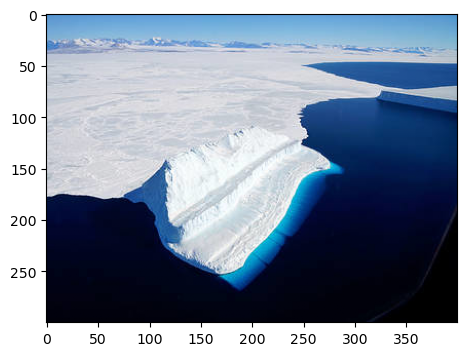


type = <class 'numpy.ndarray'>
shape = (300, 400, 3)
dtype = float64
min = 0.0
max = 1.0


In [39]:
from matplotlib import pyplot as plt     # import the pyplot function of the matplotlib package
from urllib.request import urlopen
from PIL import Image
import numpy as np

plt.rcParams['figure.figsize'] = [20, 4] # extend the figure size on screen output
url = 'https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/glacier.png'
img_mtrx = np.array(Image.open(urlopen(url)))

# or after the fact use: 
img_mtrx = img_mtrx.astype('float64')
img_mtrx[:,:,0] /= img_mtrx[:,:,0].max()
img_mtrx[:,:,1] /= img_mtrx[:,:,1].max()
img_mtrx[:,:,2] /= img_mtrx[:,:,2].max()

plt.figure(1)                            # create a figure placeholder
plt.imshow(img_mtrx)
#plt.axis('off')
plt.show()
print('')

print('type =', type(img_mtrx))
print('shape =', img_mtrx.shape)
print('dtype =', img_mtrx.dtype)
print('min =', img_mtrx.min())
print('max =', img_mtrx.max())

If the image will be used as a matrix for linear algebra operations, then make sure the image is in gray scale and the corresponding `numpy` array data type is double precision `float`.

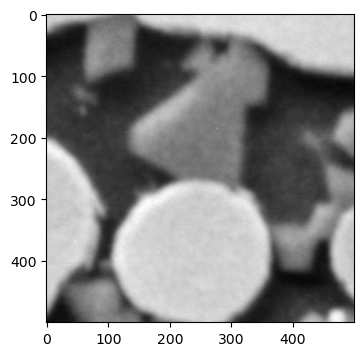


type = <class 'numpy.ndarray'>
shape = (500, 500)
dtype = float64
min = 0.07048458149779736
max = 1.0


In [41]:
from matplotlib import pyplot as plt     # import the pyplot function of the matplotlib package
from urllib.request import urlopen
from PIL import Image

plt.rcParams['figure.figsize'] = [20, 4] # extend the figure size on screen output
url = 'https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cermet.png'
img_mtrx = np.array(Image.open(urlopen(url)))

img_mtrx = img_mtrx.astype('float64')
# normalize
img_mtrx /= img_mtrx.max()

plt.figure(1)                            # create a figure placeholder
plt.imshow( img_mtrx, cmap='gray')
#plt.axis('off')
plt.show()
print('')

print('type =', type(img_mtrx))
print('shape =', img_mtrx.shape)
print('dtype =', img_mtrx.dtype)
print('min =', img_mtrx.min())
print('max =', img_mtrx.max())